# 定义深度神经网络
**批归一化, Dropout**

In [3]:
import os
import sys

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, Sequential, optimizers, layers

### 1. 准备数据

In [4]:
(x_train_all, y_train_all), (x_test, y_test) = datasets.fashion_mnist.load_data()
x_valid, x_train = x_train_all[:5000], x_train_all[5000:]
y_valid, y_train = y_train_all[:5000], y_train_all[5000:]

print(x_valid.shape, y_valid.shape)
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(5000, 28, 28) (5000,)
(55000, 28, 28) (55000,)
(10000, 28, 28) (10000,)


### 2. 构建模型

In [5]:
# 定义一个 10 层的神经网络
model = keras.models.Sequential()
model.add(layers.Flatten(input_shape=[28, 28]))
# 激活函数使用 selu 效果会更好
for _ in range(10):
    model.add(layers.Dense(50, activation="relu"))
    model.add(keras.layers.BatchNormalization())
model.add(layers.Dense(10, activation="softmax"))

# relu: y = max(0, x)
# softmax: 将向量变成概率分布. x = [x1, x2, x3], 
#          y = [e^x1/sum, e^x2/sum, e^x3/sum], sum = e^x1 + e^x2 + e^x3
optimizer = optimizers.SGD(learning_rate=0.001)
# reason for sparse: y->index. y->one_hot->[] 
# 通过 sparse 可以使 y 变为向量
model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
             metrics=["accuracy"])

In [7]:
history = model.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 16s 288us/sample - loss: 1.4574 - accuracy: 0.5156 - val_loss: 0.8386 - val_accuracy: 0.7388
Epoch 2/5
55000/55000 [==============================] - 12s 217us/sample - loss: 0.8946 - accuracy: 0.6980 - val_loss: 0.6576 - val_accuracy: 0.7788
Epoch 3/5
55000/55000 [==============================] - 12s 211us/sample - loss: 0.7784 - accuracy: 0.7353 - val_loss: 0.6572 - val_accuracy: 0.8010
Epoch 4/5
55000/55000 [==============================] - 13s 233us/sample - loss: 0.7186 - accuracy: 0.7574 - val_loss: 0.5713 - val_accuracy: 0.8156
Epoch 5/5
55000/55000 [==============================] - 12s 212us/sample - loss: 0.6737 - accuracy: 0.7721 - val_loss: 0.5379 - val_accuracy: 0.8284


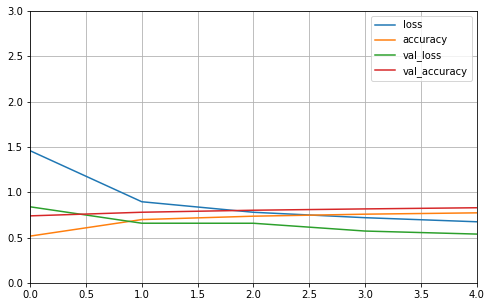

In [9]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 3)
plot_learning_curves(history)

# 1. 参数众多， 训练不充分
# 2. 梯度消失
# 3. 使用归一化可以缓解梯度消失（selu）

In [11]:
model.evaluate(x_test, y_test, verbose=0)

[0.5464226540327072, 0.814]

### 2. 添加 Dropout

In [12]:
# 定义一个 10 层的神经网络
model2 = keras.models.Sequential()
model2.add(layers.Flatten(input_shape=[28, 28]))
# 激活函数使用 selu 效果会更好
for _ in range(10):
    model2.add(layers.Dense(50, activation="selu"))
    model2.add(keras.layers.BatchNormalization())
    
model2.add(keras.layers.AlphaDropout(rate=0.5))
# AlphaDropout: 1. 均值和方差不会变 2. 归一化性质不变
# model2.add(keras.layers.Dropout(rate=0.5))

model2.add(layers.Dense(10, activation="softmax"))

optimizer = optimizers.SGD(learning_rate=0.001)
# reason for sparse: y->index. y->one_hot->[] 
# 通过 sparse 可以使 y 变为向量
model2.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer,
             metrics=["accuracy"])

In [13]:
history = model2.fit(x_train, y_train, epochs=5, validation_data=(x_valid, y_valid))

Train on 55000 samples, validate on 5000 samples
Epoch 1/5
55000/55000 [==============================] - 20s 358us/sample - loss: 1.7955 - accuracy: 0.4015 - val_loss: 0.8126 - val_accuracy: 0.7596
Epoch 2/5
55000/55000 [==============================] - 14s 259us/sample - loss: 1.2723 - accuracy: 0.5922 - val_loss: 0.7381 - val_accuracy: 0.7920
Epoch 3/5
55000/55000 [==============================] - 14s 257us/sample - loss: 1.0935 - accuracy: 0.6581 - val_loss: 0.6992 - val_accuracy: 0.8054
Epoch 4/5
55000/55000 [==============================] - 15s 265us/sample - loss: 0.9873 - accuracy: 0.6968 - val_loss: 0.6590 - val_accuracy: 0.8202
Epoch 5/5
55000/55000 [==============================] - 13s 233us/sample - loss: 0.9131 - accuracy: 0.7206 - val_loss: 0.6516 - val_accuracy: 0.8274


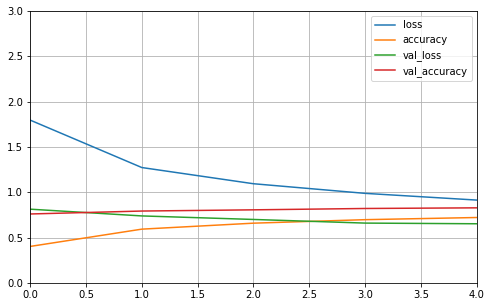

In [14]:
plot_learning_curves(history)

In [15]:
model2.evaluate(x_test, y_test, verbose=0)

[0.7023136209130287, 0.8155]